In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
from scipy.optimize import curve_fit
import pandas as pd
import json
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
A = 4 * np.pi * (.03**2)
def electron_retardation(V, Vp, ne, Te):
    I_therm = c.elementary_charge * ne * A * np.sqrt((c.Boltzmann * Te) / (2 * np.pi * c.electron_mass))
    return I_therm * np.exp((c.elementary_charge * (V-Vp)) / (c.Boltzmann * Te))
def electron_saturation(V, Vp, ne, Te):
    I_therm = c.elementary_charge * ne * A * np.sqrt((c.Boltzmann * Te) / (2 * np.pi * c.electron_mass))
    return I_therm * np.pow(1 + ((c.elementary_charge * (V-Vp)) / (c.Boltzmann * Te)), 1)
def ion_sat(V, Vf, Vp, ne, Te, a):
    #point slope form to ensure that the IV curve is continuous as Vf
    return a * V - a * Vf + electron_retardation(Vf, Vp, ne, Te)

In [3]:
def IV_curve(V, Vf, Vp, ne, Te,a):
    if (V <= Vf):
        return ion_sat(V,Vf, Vp, ne, Te, a)
    elif(V > Vf and V <= Vp):
        return electron_retardation(V, Vp, ne, Te)
    else:
        return electron_saturation(V, Vp, ne, Te)
vec_IV_curve = np.vectorize(IV_curve)

In [4]:
with open("Simulated_IV_Curves_v1.json") as f:
    loaded_data = json.load(f)

df= pd.DataFrame(loaded_data)
print(df.keys())

Index(['Index', 'Latitude', 'Vp', 'Vf', 'ne', 'Te', 'V', 'I'], dtype='object')


In [5]:
df["I_avg"] = df["I"].apply(lambda x: pd.Series(x).rolling(30).mean().tolist())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28 146 149 190 191 194 195 198
 203 204 215 216 217 255 256 266 267 271 272 275 276 280 283 284 285 287]


Text(0, 0.5, 'Current [A]')

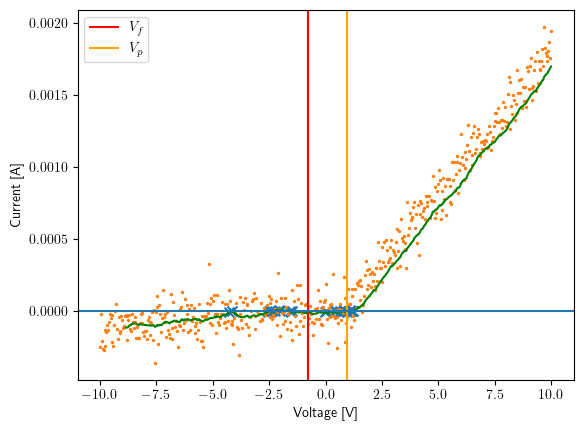

In [6]:
n = 15
V = np.array(df["V"][n])
I_avg = np.array(df["I_avg"][n])
zeros = np.where(np.diff(np.sign(I_avg)))[0]
plt.plot(df["V"][n], df["I_avg"][n], c="g")
plt.scatter(V[zeros], I_avg[zeros], s = 50,marker="x")
print(zeros)
plt.scatter(df["V"][n], df["I"][n], s = 2)
vf = plt.axvline(df["Vf"][n], c = "red", label = r"$V_f$")
vp = plt.axvline(df["Vp"][n], c = "orange", label = r"$V_p$")
plt.legend(handles = [vf,vp])
plt.axhline(0)
plt.xlabel(r"Voltage [V]")
plt.ylabel(r"Current [A]")
# plt.ylim(-.0001,.0001)
# zero_V = []
# for i in zeros:
#     x0, x1 = V[i], V[i+1]
#     y0, y1 = I_avg[i], I_avg[i+1]
    
#     if y1 != y0:  # avoid division by zero
#         x_cross = x0 - y0 * (x1 - x0) / (y1 - y0)  # linear interpolation
#         zero_V.append(x_cross)
# plt.scatter(zero_V, np.zeros_like(zero_V), s = 50,marker="x")

Text(0, 0.5, '$\\frac{dI}{dV}$ [A/V]')

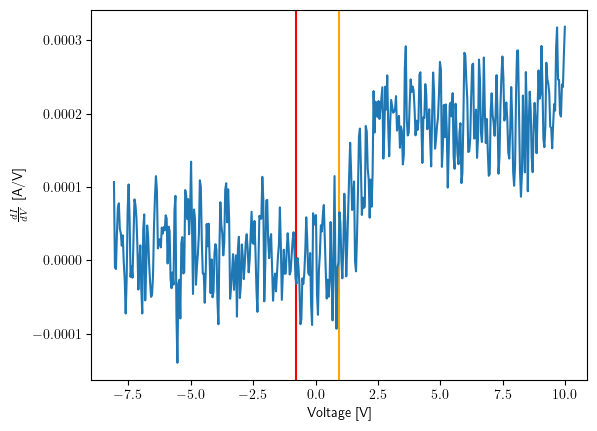

In [11]:
m = 15
df["dIdV"] = df.apply(lambda row: np.gradient(row["I"], row["V"]), axis=1)
df["dIdV_avg"] = df["dIdV"].apply(lambda x: pd.Series(x).rolling(50).mean().tolist())
vf = plt.axvline(df["Vf"][m], c = "red", label = r"$V_f$")
vp = plt.axvline(df["Vp"][m], c = "orange", label = r"$V_p$")

#dVmax = df['V'][np.argmax(df["dIdV"][m])]
#print(dVmax)
#plt.plot(V, I_avg, c="g")
plt.plot(df['V'][m], df["dIdV_avg"][m])
plt.xlabel(r"Voltage [V]")
plt.ylabel(r"$\frac{dI}{dV}$ [A/V]")
# for i in dVmax:
#     plt.axvline(i)

In [8]:
def electron_saturation(V, Vp, ne, Te):
    I_therm = c.elementary_charge * ne * A * np.sqrt((c.Boltzmann * Te) / (2 * np.pi * c.electron_mass))
    return I_therm * np.pow(1 + ((c.elementary_charge * (V-Vp)) / (c.Boltzmann * Te)), 1)
def model(V,Vp, ne, Te, a):
    if (V < Vp):
        return a * (V - Vp) + electron_saturation(Vp,Vp,ne,Te)
    else:
        return electron_saturation(V,Vp,ne, Te)
vec_model = np.vectorize(model)

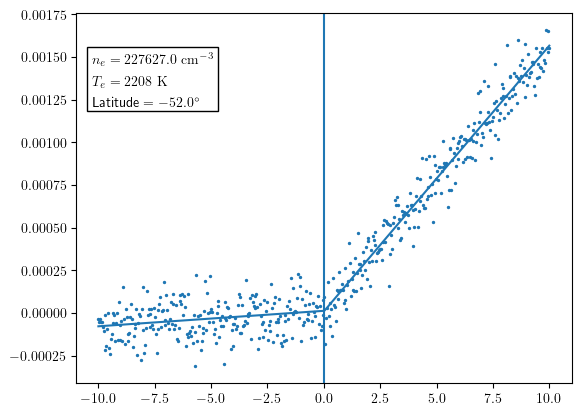

Density =  150263.691245178  ±  3.6843415065853916e-13 Temp =  992.2459418995403  ±  27.634760610764186
[[ 6.29512304e-03  2.52050662e-08 -1.89053053e+00 -1.04230235e-08]
 [ 2.52050662e-08  1.35743723e-13 -1.01815896e-05 -4.43509910e-14]
 [-1.89053053e+00 -1.01815896e-05  7.63679994e+02  3.32658922e-06]
 [-1.04230235e-08 -4.43509910e-14  3.32658922e-06  1.17629671e-12]]


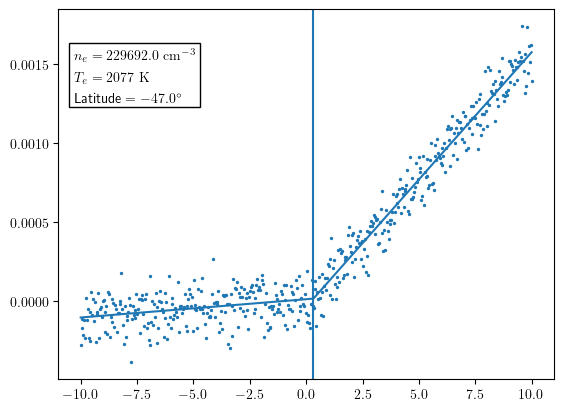

Density =  171404.32827949565  ±  4.77481009203357e-13 Temp =  1205.880852073114  ±  34.17560321958793
[[ 6.07863870e-03  3.20082968e-08 -2.29098731e+00 -1.25164394e-08]
 [ 3.20082968e-08  2.27988114e-13 -1.63182015e-05 -7.01934687e-14]
 [-2.29098731e+00 -1.63182015e-05  1.16797186e+03  5.02408311e-06]
 [-1.25164394e-08 -7.01934687e-14  5.02408311e-06  1.11145290e-12]]


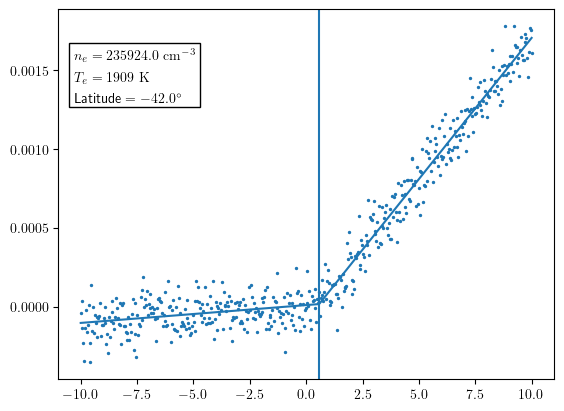

Density =  188112.26388727428  ±  3.922456829218619e-13 Temp =  1178.2766426807204  ±  31.164432649428175
[[ 5.03334273e-03  2.39575447e-08 -1.90345835e+00 -1.01314626e-08]
 [ 2.39575447e-08  1.53856676e-13 -1.22241142e-05 -5.16775501e-14]
 [-1.90345835e+00 -1.22241142e-05  9.71221862e+02  4.10584908e-06]
 [-1.01314626e-08 -5.16775501e-14  4.10584908e-06  1.01449455e-12]]


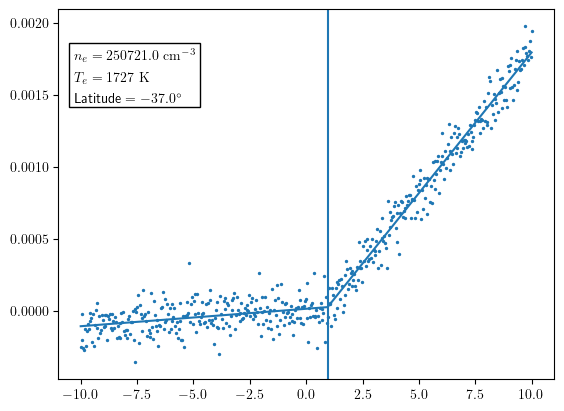

Density =  228486.77993208586  ±  4.61546266844303e-13 Temp =  1457.7578603521076  ±  35.81690542633346
[[ 3.95822867e-03  2.49205257e-08 -1.93388223e+00 -8.78100665e-09]
 [ 2.49205257e-08  2.13024956e-13 -1.65311590e-05 -6.02990709e-14]
 [-1.93388223e+00 -1.65311590e-05  1.28285071e+03  4.67932749e-06]
 [-8.78100665e-09 -6.02990709e-14  4.67932749e-06  8.42701513e-13]]


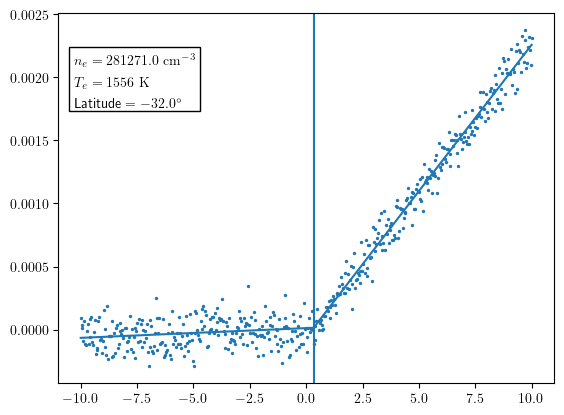

Density =  194344.99548854565  ±  1.177577991481164e-13 Temp =  750.0000025894434  ±  15.227830095757787
[[ 3.15231227e-03  5.69884724e-09 -7.36945520e-01 -4.59358213e-09]
 [ 5.69884724e-09  1.38668993e-14 -1.79319576e-06 -8.97132979e-15]
 [-7.36945520e-01 -1.79319576e-06  2.31886809e+02  1.16012606e-06]
 [-4.59358213e-09 -8.97132979e-15  1.16012606e-06  1.14947688e-12]]


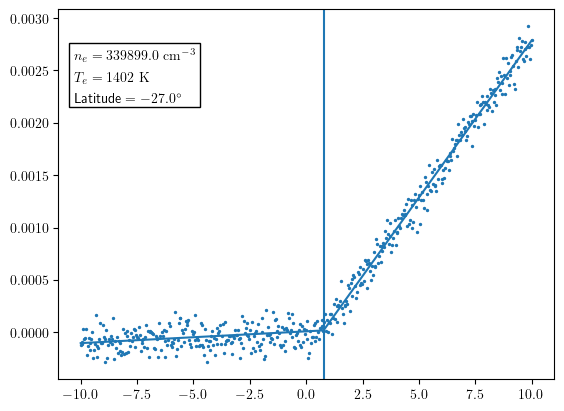

Density =  251387.74426063377  ±  7.044700998347323e-14 Temp =  750.0014526079533  ±  12.06568372133685
[[ 1.80799706e-03  2.58562118e-09 -4.42847652e-01 -3.62228720e-09]
 [ 2.58562118e-09  4.96278122e-15 -8.49991342e-07 -5.56929262e-15]
 [-4.42847652e-01 -8.49991342e-07  1.45580724e+02  9.53870604e-07]
 [-3.62228720e-09 -5.56929262e-15  9.53870604e-07  9.21270950e-13]]


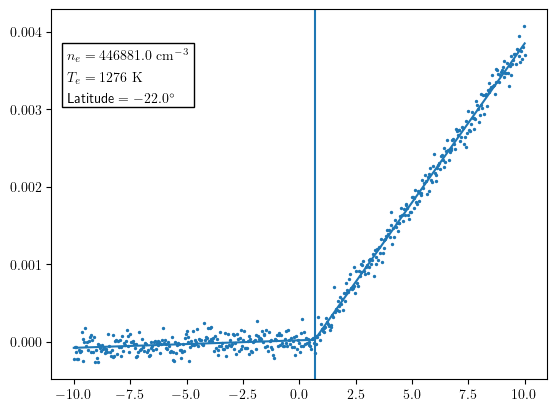

Density =  351781.7423719153  ±  4.016456630604739e-14 Temp =  781.9567272851788  ±  9.017059218563382
[[ 9.45755642e-04  1.06653417e-09 -2.39439969e-01 -1.88551289e-09]
 [ 1.06653417e-09  1.61319239e-15 -3.62166273e-07 -2.35481865e-15]
 [-2.39439969e-01 -3.62166273e-07  8.13073570e+01  5.28663502e-07]
 [-1.88551289e-09 -2.35481865e-15  5.28663502e-07  9.28657913e-13]]


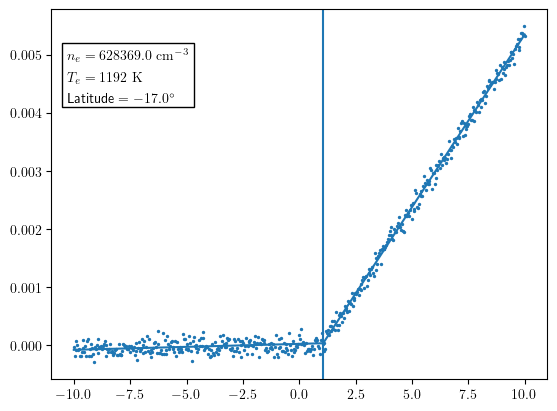

Density =  498473.4927348277  ±  1.925241633418e-14 Temp =  750.0000028406014  ±  6.436590598463696
[[ 4.81659548e-04  3.64423441e-10 -1.21836380e-01 -1.09267669e-09]
 [ 3.64423441e-10  3.70655535e-16 -1.23919922e-07 -9.36757707e-16]
 [-1.21836380e-01 -1.23919922e-07  4.14296985e+01  3.13182825e-07]
 [-1.09267669e-09 -9.36757707e-16  3.13182825e-07  8.64107513e-13]]


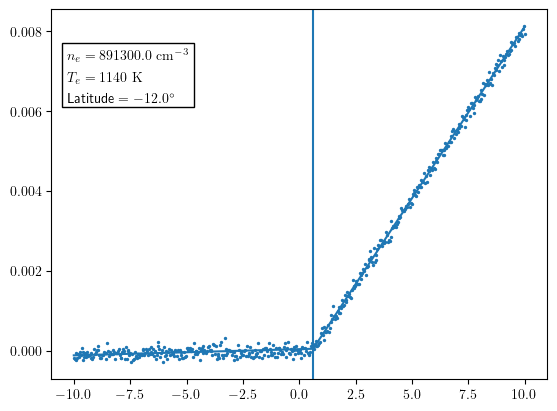

Density =  720110.3379425738  ±  9.047408744119706e-15 Temp =  750.0000082231063  ±  4.352375303081394
[[ 2.43138086e-04  1.21783150e-10 -5.85853967e-02 -8.38343541e-10]
 [ 1.21783150e-10  8.18556050e-17 -3.93777184e-08 -4.72256667e-16]
 [-5.85853967e-02 -3.93777184e-08  1.89431708e+01  2.27185312e-07]
 [-8.38343541e-10 -4.72256667e-16  2.27185312e-07  1.07252504e-12]]


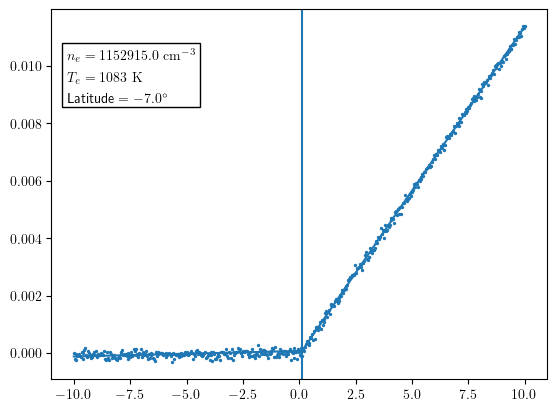

Density =  958909.0160130973  ±  4.579400361734036e-15 Temp =  750.000003765426  ±  2.931497885266008
[[ 1.22193669e-04  4.36767286e-11 -2.79596103e-02 -5.50421449e-10]
 [ 4.36767286e-11  2.09709077e-17 -1.34245025e-08 -2.21740138e-16]
 [-2.79596103e-02 -1.34245025e-08  8.59367985e+00  1.41946703e-07]
 [-5.50421449e-10 -2.21740138e-16  1.41946703e-07  1.16527284e-12]]


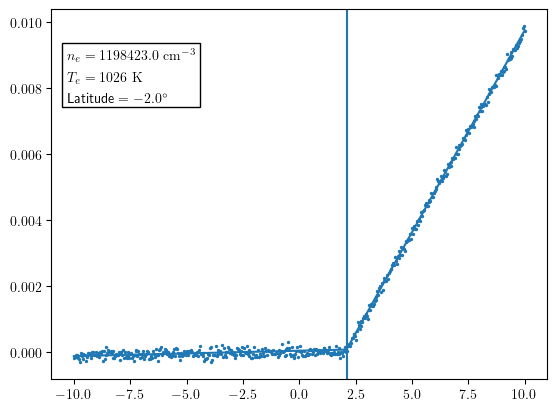

Density =  1026536.1377992858  ±  5.459540126838024e-15 Temp =  750.0000064648598  ±  3.7175629778708004
[[ 1.25663908e-04  5.28308020e-11 -3.59740643e-02 -4.89569823e-10]
 [ 5.28308020e-11  2.98065784e-17 -2.02961843e-08 -2.39595374e-16]
 [-3.59740643e-02 -2.02961843e-08  1.38202745e+01  1.63147610e-07]
 [-4.89569823e-10 -2.39595374e-16  1.63147610e-07  6.42008117e-13]]


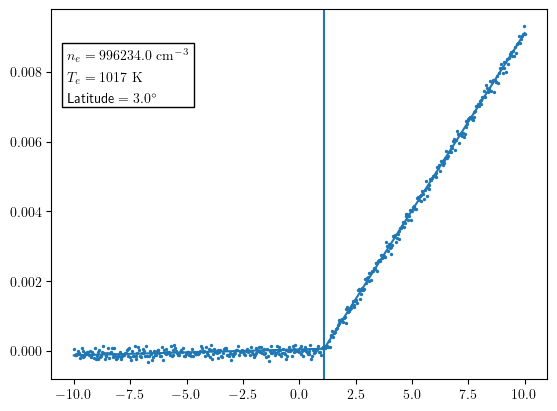

Density =  852887.0160212249  ±  6.901030430743182e-15 Temp =  750.0000002485333  ±  3.945930743982682
[[ 1.79145593e-04  7.96425796e-11 -4.55387258e-02 -6.79797869e-10]
 [ 7.96425796e-11  4.76242210e-17 -2.72309881e-08 -3.43495044e-16]
 [-4.55387258e-02 -2.72309881e-08  1.55703694e+01  1.96406571e-07]
 [-6.79797869e-10 -3.43495044e-16  1.96406571e-07  9.27195932e-13]]


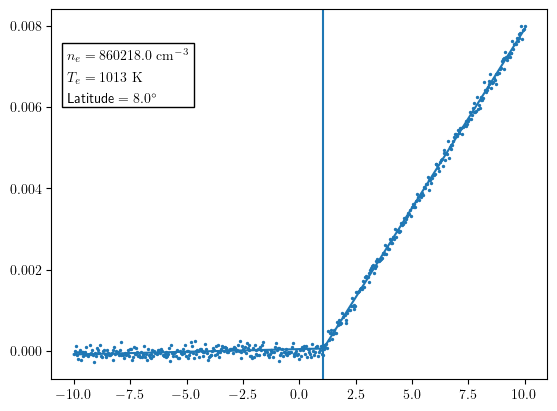

Density =  738401.0270779111  ±  8.678587354851522e-15 Temp =  750.0003280335496  ±  4.272698892038426
[[ 2.11377579e-04  1.08750808e-10 -5.35409136e-02 -6.44086177e-10]
 [ 1.08750808e-10  7.53178785e-17 -3.70809906e-08 -3.80289138e-16]
 [-5.35409136e-02 -3.70809906e-08  1.82559558e+01  1.87226444e-07]
 [-6.44086177e-10 -3.80289138e-16  1.87226444e-07  8.32229739e-13]]


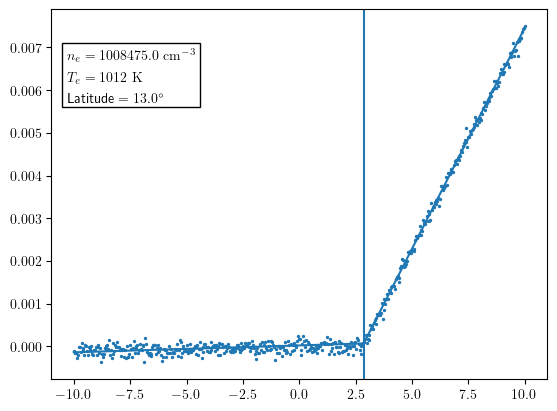

Density =  867321.4540118572  ±  9.480960977765712e-15 Temp =  750.0000014611915  ±  5.442769744534641
[[ 2.18982634e-04  1.20903733e-10 -6.94076487e-02 -7.73483443e-10]
 [ 1.20903733e-10  8.98886211e-17 -5.16026876e-08 -4.95994506e-16]
 [-6.94076487e-02 -5.16026876e-08  2.96237425e+01  2.84737376e-07]
 [-7.73483443e-10 -4.95994506e-16  2.84737376e-07  6.09628971e-13]]


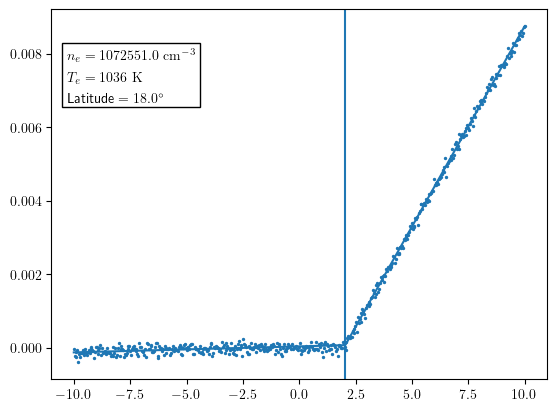

Density =  915156.3394560923  ±  6.829173048282047e-15 Temp =  750.0000006566561  ±  4.172134253144269
[[ 1.59966250e-04  7.44433889e-11 -4.54795677e-02 -5.92123547e-10]
 [ 7.44433889e-11  4.66376045e-17 -2.84922268e-08 -3.18402258e-16]
 [-4.54795677e-02 -2.84922268e-08  1.74067042e+01  1.94520919e-07]
 [-5.92123547e-10 -3.18402258e-16  1.94520919e-07  6.71095464e-13]]


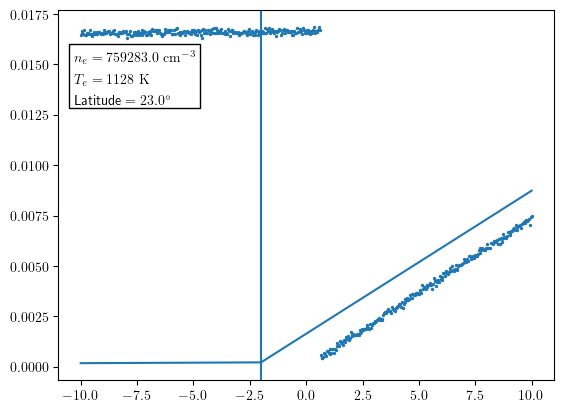

Density =  1285809.4990345878  ±  1.0469015302525244e-11 Temp =  3499.9999999999995  ±  1925.9230203128002
[[ 3.38002259e+00  1.64460826e-05 -3.02548893e+03 -2.04680189e-05]
 [ 1.64460826e-05  1.09600281e-10 -2.01625176e-02 -1.30718035e-10]
 [-3.02548893e+03 -2.01625176e-02  3.70917948e+06  2.40474263e-02]
 [-2.04680189e-05 -1.30718035e-10  2.40474263e-02  3.22779915e-08]]


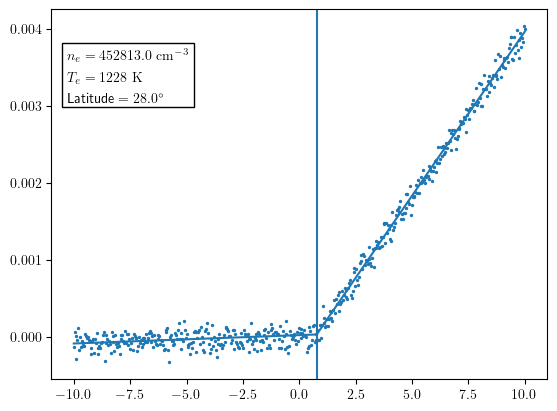

Density =  357542.7539674606  ±  3.475830557995926e-14 Temp =  750.0000001879478  ±  8.32922441194511
[[ 8.60473129e-04  8.80009433e-10 -2.10878998e-01 -1.83939309e-09]
 [ 8.80009433e-10  1.20813981e-15 -2.89509727e-07 -2.06965206e-15]
 [-2.10878998e-01 -2.89509727e-07  6.93759793e+01  4.95956207e-07]
 [-1.83939309e-09 -2.06965206e-15  4.95956207e-07  8.83063221e-13]]


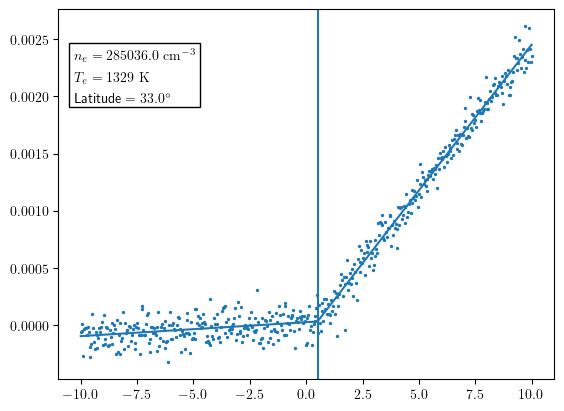

Density =  302854.651815244  ±  2.719708040618285e-13 Temp =  1507.3653941689129  ±  27.503334772481622
[[ 2.41064602e-03  1.14771757e-08 -1.16064158e+00 -6.00049883e-09]
 [ 1.14771757e-08  7.39681183e-14 -7.48010407e-06 -3.16261627e-14]
 [-1.16064158e+00 -7.48010407e-06  7.56433424e+02  3.19822922e-06]
 [-6.00049883e-09 -3.16261627e-14  3.19822922e-06  1.01675198e-12]]


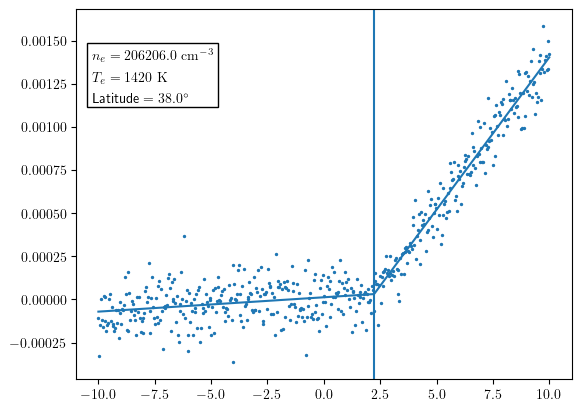

Density =  243585.3258498392  ±  1.2375480950607747e-12 Temp =  2029.8169023130329  ±  74.2047756070307
[[ 6.31331777e-03  8.40232859e-08 -5.03813087e+00 -1.11263031e-08]
 [ 8.40232859e-08  1.53152529e-12 -9.18319787e-05 -1.71165239e-13]
 [-5.03813087e+00 -9.18319787e-05  5.50634872e+03  1.02632604e-05]
 [-1.11263031e-08 -1.71165239e-13  1.02632604e-05  6.96777264e-13]]


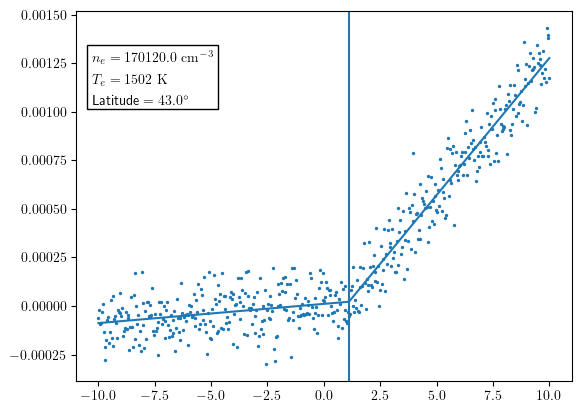

Density =  182987.7342102317  ±  1.2678859434021266e-12 Temp =  1791.3482261829624  ±  66.46777262622071
[[ 8.60729485e-03  1.00673501e-07 -5.27771747e+00 -1.57732077e-08]
 [ 1.00673501e-07  1.60753477e-12 -8.42735546e-05 -2.02966815e-13]
 [-5.27771747e+00 -8.42735546e-05  4.41796480e+03  1.06403519e-05]
 [-1.57732077e-08 -2.02966815e-13  1.06403519e-05  9.21614617e-13]]


In [9]:
for i in range(0,100,5):
    V = df["V"][i]
    I = df["I"][i]
    popt, pcov = curve_fit(vec_model,df["V"][i],df["I"][i],p0 =  ( df["Vp"][i], df["ne"][i], df["Te"][i],.00001),
                                                bounds = ([-2,1e11, 750, .000005],[3.,1e14, 3500, .00005]))
    p_sigma = np.sqrt(np.diag(pcov))
    
    plt.plot(df["V"][i], vec_model(df["V"][i], *popt))
    plt.axvline(popt[0])
    string = (
    r"$\begin{aligned}"
    f"&n_e = {df["ne"][i] * 1e-6}~{{\\rm cm}}^{{-3}} \\\\ "
    f"&T_e = {df["Te"][i]}~{{\\rm K}} \\\\"
    f" &\\text{{Latitude}} = {df["Latitude"][i]}^{{\\circ}}"
    r"\end{aligned}$"
    )
    plt.figtext(.15,.8, string, ha = "left", va = "top",
             bbox=dict(facecolor = 'white',edgecolor='black', pad = 3.5))
    plt.scatter(df["V"][i], df["I"][i], s = 2)
    plt.show()
    print("Density = ", popt[1] * 1e-6, " ± ", p_sigma[1] * 1e-6, "Temp = ", popt[2]," ± ", p_sigma[2])
    print(pcov)
    